<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/6%EC%8B%9C%EA%B3%84%EC%97%B4_2%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%B1%EC%A7%88_250522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KPSS 검정  ( Kwiatkowski–Phillips–Schmidt–Shin)
시계열 데이터가 수정된 평균 정상성(mean-stationary) 또는 추세 정상성(trend-stationary) 을 갖는지를 평가

- 귀무가설 : 시계열 과정이 정상적이다.
- 대립가설 : 시계 과정이 비정상적이다
- 반환되는 값 : kpss_stat, p_value, lags, crit 등을 반환하는데, 가장 직관적인 방법은 p-value 이다.

In [13]:
# kpss 불러오기
from statsmodels.tsa.stattools import kpss

# 시계열 데스트 데이터
time_series_data_test = [1,2,3,4,5,6,7,8,9,10]

# KPSS 검정 수행
kpss_outputs = kpss(time_series_data_test)

# 검정 결과 출력
print('Kpss test 결과 :')
print('___' * 15)
print('  ' *50)

print('KPSS Statistic : ', kpss_outputs[0])
print('  ' *50)
print('p-value : ', kpss_outputs[1])



#========
# KPSS Statistic 의미는?   시계열 데이터의 비정상성(non-stationarity) 정도를 수치적으로 나타내는 값. 정상성에서 얼마나 벗어낫는가?
# - 값이 클수록	정상성이 약하고 비정상성 강함 (귀무가설 기각 가능성↑)
# - 값이 작을수록	정상성이 강함 (귀무가설 채택 가능성↑)

# -> 시계열의 추세 항(trend component) 혹은 레벨(수준) 구성 요소가 랜덤워크로부터 벗어나 있는 정도를 측정하는 지표.
# 정상성에서 얼마나 벗어낫는가?
# 0에 가까우면 정상성에 가까운 값. 값이 클수록 잔차가 누적되어 있다는 뜻 -> 정상성이 떨어진다는 의미


# -> KPSS Statistic = 0.594는 위 임계값보다 훨씬 크기 때문에,이는 귀무가설(정상성)을 기각하고, 비정상성(non-stationarity) 으로 판단
# 임계값(Critical values)(approximate):
# 10%: 0.119
# 5% : 0.146
# 2.5%: 0.176
# 1% : 0.216  (일반적인 임계값)


#p-value 결과 값 : 0.023으로 0.05 보다 작으로 귀무가설 기각 -> 시계열 과정이 비정상적이다.

Kpss test 결과 :
_____________________________________________
                                                                                                    
KPSS Statistic :  0.5941176470588235
                                                                                                    
p-value :  0.023171122994652404


### ADP 검정  ( (Augmented Dickey-Fuller))
시계열 데이터에 단위근(unit root) 이 존재하는지를 검정하여, 데이터가 비정상(non-stationary) 인지를 판단하는 대표적인 통계적 방법

- 귀무가설 : 시계열은 비정상(non-stationary) -> 단위근이 존재한다.
- 대립가설 : 시계열이 정상성(stationary)을 만족한다.
- 반화되는 값 : adf, p_value, usedlag, nobs, critical values 등 반환하는데, p-value를 활용하는 것이 가장 직관적

In [12]:
# adfuller 불러오기
from statsmodels.tsa.stattools import adfuller

# 시계열 데스트 데이터
time_series_data_test = [1,2,3,4,5,6,7,8,9,10]

# KPSS 검정 수행
adf_outputs = adfuller(time_series_data_test)

# 검정 결과 출력
print('ADF test 결과 :')
print('___' * 15)
print('  ' *50)

print('ADF Statistic : ', adf_outputs[0])
print('  ' *50)
print('p-value : ', adf_outputs[1])


#================
# ADF Statistic 0.59 값의 의미는?     인덱스가 [0]인 이유?
# p-value 0.95                        인덱스가 [1]인 이유?

ADF test 결과 :
_____________________________________________
                                                                                                    
ADF Statistic :  0.0
                                                                                                    
p-value :  0.958532086060056


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


### 정상성을 부여하는 방법
1. 분산을 일정하게 만드는 방법
  1. 로그 변환

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 시계열 데이터 정의
time_series_data = [1,2,3,4,5,6,7,8,9,10]

# 아래의 주석을 없애고 다시 실행해보세요.
# time_series_data = [random.randint(1, 100) for _ in range(50)]

# 시계열 데이터 로그 변환
time_series_data_log = np.log(time_series_data)


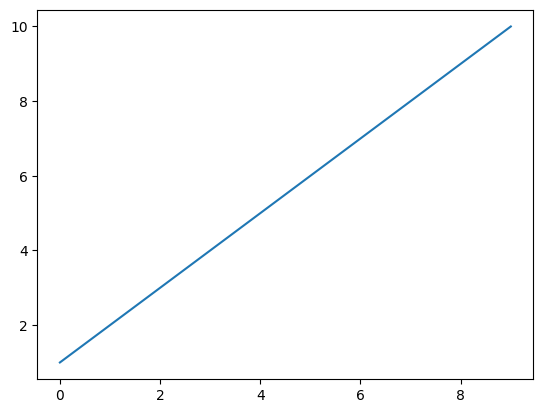

In [31]:
# 로그 변환되지 않은 시계열 데이터 시각화
plt.plot(time_series_data)
plt.show()

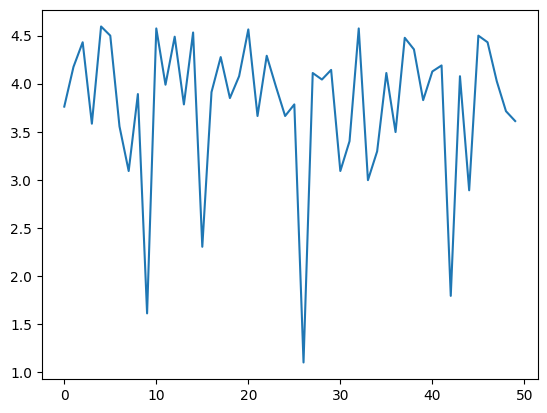

In [36]:

# 로그 변환된 시계열 데이터 시각화
plt.plot(time_series_data_log)
plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 시계열 데이터 정의
time_series_data = [1,2,3,4,5,6,7,8,9,10]


time_series_data = [random.randint(1, 100) for _ in range(50)]


# 시계열 데이터 로그 변환
time_series_data_log = np.log(time_series_data)


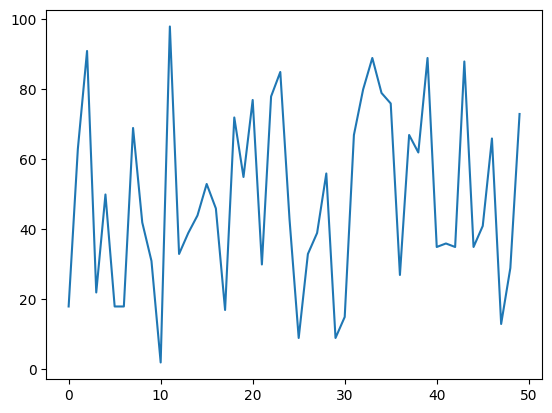

In [39]:
# 로그 변환되지 않은 시계열 데이터 시각화
plt.plot(time_series_data)
plt.show()

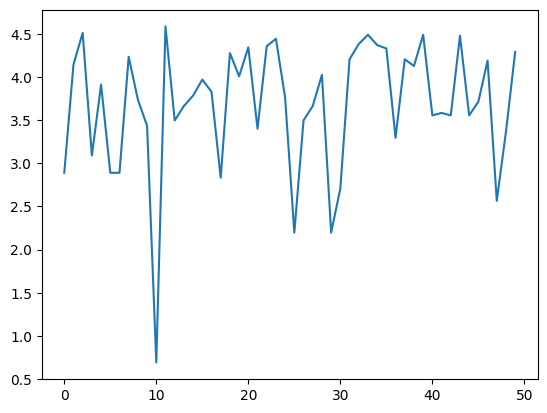

In [40]:
# 로그 변환된 시계열 데이터 시각화
plt.plot(time_series_data_log)
plt.show()

### 2. 평균을 일정하게 만드는 방법
  1. 회귀(regression approach)
     - 시계열 데이터를 선형 회귀 모델을 사용하여, 예측된 값을 실제값과의 차리를 통해,
     - 평균을 일정하게 조정할 수 있다. predictions는 선형회귀모델을 통해 나온 예측된 값

  2. 평활(smoothing)
    - 시계열 데이터의 잡음을 제거하기 위해 주로 사용
    - smoothed_value가 value에 비해 많이 평활(smoothing) 해 진것을 확인

  3. 차분(differencing) : 시계열 데이터들의 시간상의 차이를 구하는 것

array([<Axes: >, <Axes: >], dtype=object)

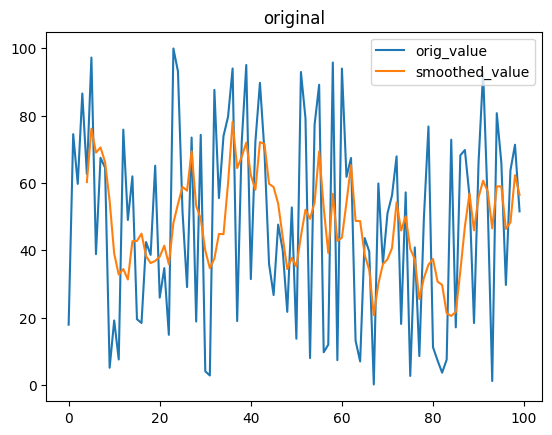

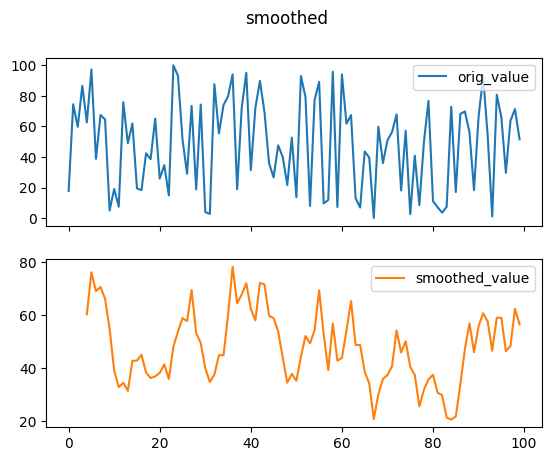

In [41]:
import random
import pandas as pd

# 랜덤한 수를 가지고 있는 Pandas 데이터프레임을 생성합니다.
df0 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})
df1 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})

df0['smoothed_value'] = df0['orig_value'].rolling(5).mean()


# 잡음이 포함된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, title='original')


# 잡음이 제거된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, subplots=True, title='smoothed')

<Axes: title={'center': 'original'}>

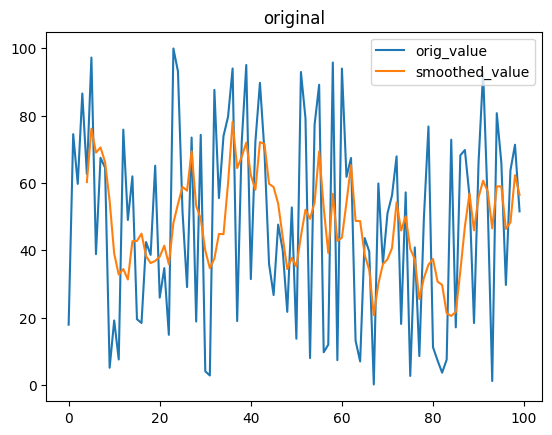

In [43]:
# 잡음이 포함된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, title='original')

array([<Axes: >, <Axes: >], dtype=object)

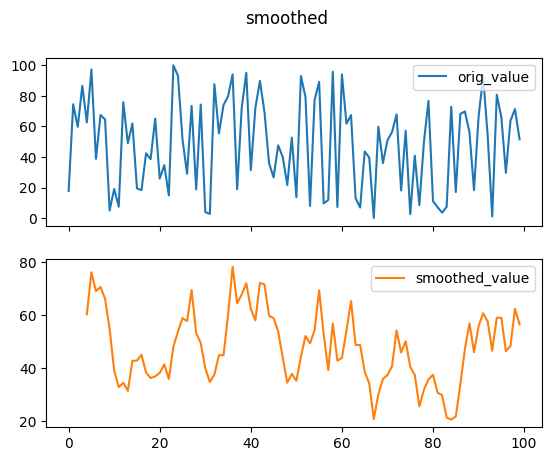

In [44]:
# 잡음이 제거된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, subplots=True, title='smoothed')

<Axes: title={'center': 'original'}>

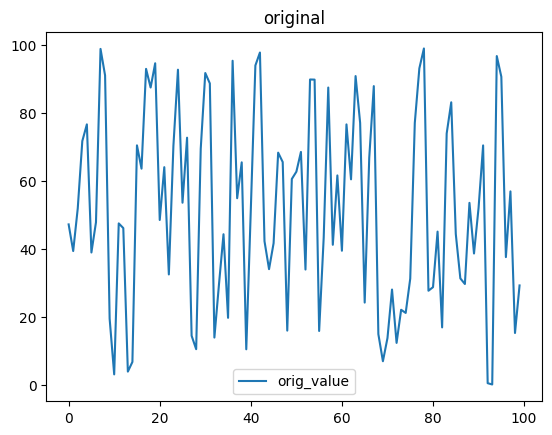

In [45]:
# 위에서 사용한 잡음이 있는 데이터를 그대로 활용하여 시각화합니다.
df1.plot(title='original')

array([<Axes: >, <Axes: >], dtype=object)

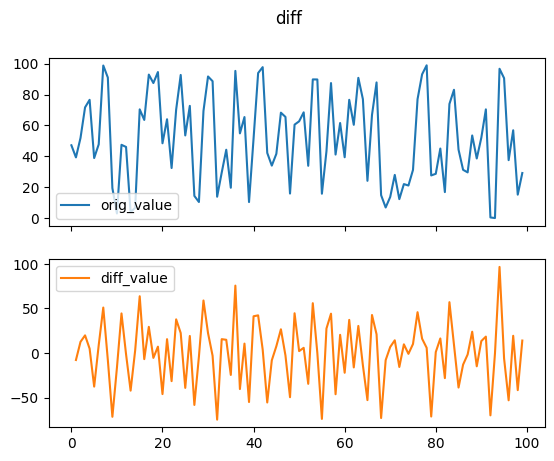

In [46]:
# 차분을 적용하고 시각화합니다.
df1['diff_value'] = df1['orig_value'].diff()
df1.plot(legend=True, subplots=True, title='diff')